# Practical 4

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names=["Label", "Content"])
df

,Label,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
df = pd.read_csv("SMSSpamCollection2", sep="\t", names=["Label", "Content"])


In [23]:
df.shape

(5572, 2)

In [24]:
!pip install nltk

In [25]:
import nltk

In [26]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sunandan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sunandan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize

In [29]:
ps = PorterStemmer()


In [30]:
swords = stopwords.words("english")

In [31]:
def cleanSentence(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isalpha() or word.isdigit()]
    clean = [ps.stem(word) for word in clean if word not in swords]


    return clean

In [32]:
sent = "Hello there, I'm using whatsapp"
cleanSentence(sent)

['hello', 'i', 'use', 'whatsapp']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer(analyzer=cleanSentence)

In [35]:
x = df["Content"]
y = df["Label"]

In [36]:
newX = tfidf.fit_transform(x)

In [37]:
newX

<5572x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 52578 stored elements in Compressed Sparse Row format>

In [38]:
y.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(newX, y, test_size=0.25)

In [40]:
trainX

<4179x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 39120 stored elements in Compressed Sparse Row format>

In [41]:
testX

<1393x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 13458 stored elements in Compressed Sparse Row format>

In [42]:
trainY

4775     ham
3357     ham
5085     ham
512      ham
1691    spam
        ... 
1092     ham
2567     ham
3347     ham
1427     ham
1134     ham
Name: Label, Length: 4179, dtype: object

In [43]:
from sklearn.naive_bayes import GaussianNB


In [44]:
classifier = GaussianNB()

In [45]:
classifier.fit(trainX.toarray(),trainY)

GaussianNB()

In [46]:
result = pd.DataFrame({
    'actual' : testY,
    'predicated' : classifier.predict(testX.toarray())
})

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

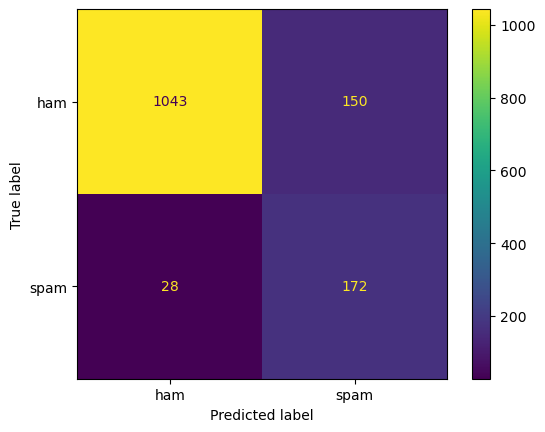

In [48]:
ConfusionMatrixDisplay.from_predictions(result.actual, result.predicated, colorbar=True)

In [49]:
accuracy_score(result.actual, result.predicated)

0.8722182340272793

In [50]:
print(classification_report(result.actual, result.predicated))

              precision    recall  f1-score   support

         ham       0.97      0.87      0.92      1193
        spam       0.53      0.86      0.66       200

    accuracy                           0.87      1393
   macro avg       0.75      0.87      0.79      1393
weighted avg       0.91      0.87      0.88      1393



In [51]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(random_state=0)

In [53]:
rf.fit(trainX, trainY)

RandomForestClassifier(random_state=0)

In [54]:
result = pd.DataFrame({
    'actual' : testY,
    'predicted' : rf.predict(testX)
})

In [55]:
print(classification_report(result.actual, result.predicted))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1193
        spam       1.00      0.84      0.91       200

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



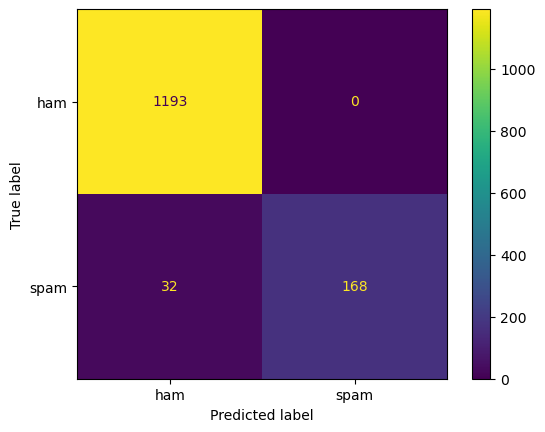

In [56]:
ConfusionMatrixDisplay.from_predictions(result.actual, result.predicted)

In [57]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(trainX, trainY)
print(classification_report(testY, lr.predict(testX)))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1193
        spam       0.99      0.71      0.83       200

    accuracy                           0.96      1393
   macro avg       0.97      0.86      0.90      1393
weighted avg       0.96      0.96      0.96      1393



In [60]:
# HYPER PARAMETER TUNING

from sklearn.model_selection import GridSearchCV

In [61]:
params = {
    "criterion" : ["gini", "entropy"],
    "random_state": [0,1,2,3,4],
    "max_features" : ["sqrt", "log2"],
    "class_weight" : ["balanced", "balanced_subsample"]
}

In [62]:
grid = GridSearchCV(rf, param_grid=params)

In [63]:
grid.fit(trainX, trainY)

KeyboardInterrupt: 

In [ ]:
grid.best_estimator_

In [ ]:
rf = grid.best_estimator_

In [ ]:
rf.fit(trainX, trainY)

In [ ]:
print(classification_report(testY, rf.predict(testX)))

In [ ]:
accuracy_score(testY, rf.predict(testX))